# Test

In [ ]:
import numpy as np

In [ ]:
L = 8.8
W = 3.2

In [ ]:
res = 1e1
xx,yy = np.mgrid[0:L:1/res,0:W:1/res]

In [ ]:
def get_mask(center, radius, error, pts=(xx,yy)):
  return np.abs(np.sqrt((pts[0] - center[0])**2 + (pts[1] - center[1])**2) - radius) <= error

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
def maskshow(mask):
  plt.imshow(mask.T)

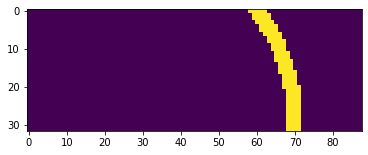

In [ ]:
maskshow(get_mask((2,3), 5, 0.2))

In [ ]:
centers = np.array((
           (0.2, 0.2),
           (L - 0.2, 0.2),
           (L - 0.2, W - 0.2),
           (0.2, W - 0.2)
))

In [ ]:
def get_pt_mask(pt, error=0.2):
  pt = np.array(pt)
  mask = np.ones_like(xx, dtype=bool)
  for center in centers:  # vectorize?
    mask &= get_mask(center, np.linalg.norm(pt - center), error)
  return mask

15

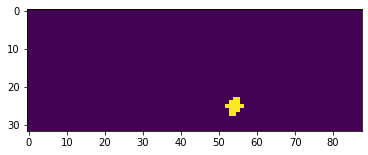

In [ ]:
mask = get_pt_mask((5.4, 2.5))
maskshow(mask)
mask.sum()

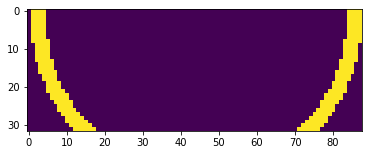

In [ ]:
pt = np.array((L - 0.5, W / 2))
maskshow(get_mask(centers[0],  np.linalg.norm(pt - centers[0]), 0.2))

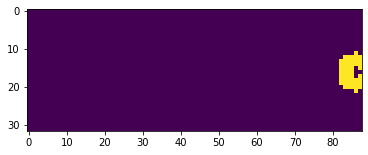

In [ ]:
maskshow(get_mask(centers[1],  np.linalg.norm(pt - centers[1]), 0.2))

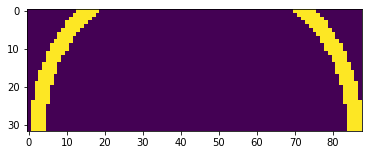

In [ ]:
maskshow(get_mask(centers[2],  np.linalg.norm(pt - centers[2]), 0.2))

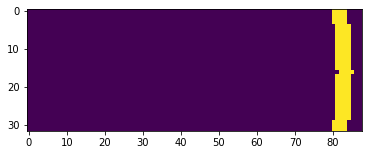

In [ ]:
maskshow(get_mask(centers[3],  np.linalg.norm(pt - centers[3]), 0.2))

22

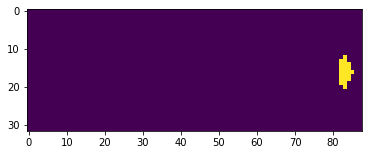

In [ ]:
mask = get_pt_mask((L - 0.5, W / 2))
maskshow(mask)
mask.sum()

13

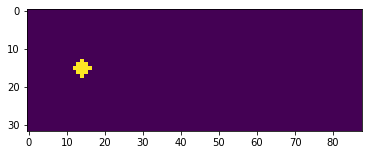

In [ ]:
mask = get_pt_mask((1.4, 1.5))
maskshow(mask)
mask.sum()

27

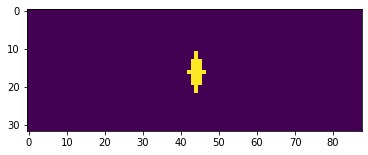

In [ ]:
mask = get_pt_mask((L/2, W/2))
maskshow(mask)
mask.sum()

14

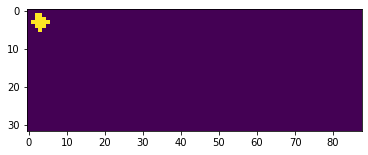

In [ ]:
mask = get_pt_mask((0.3, 0.3))
maskshow(mask)
mask.sum()

# ACtual

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
L = 8.8
W = 3.2

In [ ]:
res = 4e1
xx,yy = np.mgrid[0:L:1/res,0:W:1/res]

In [ ]:
def get_mask(center, radius, error, pts=(xx,yy)):
  return np.abs(np.sqrt((pts[0] - center[0])**2 + (pts[1] - center[1])**2) - radius) <= error

In [ ]:
def get_pt_mask(pt, centers, pts=(xx,yy), error=0.2):
  pt = np.array(pt)
  mask = np.ones_like(pts[0], dtype=bool)
  for center in centers:  # vectorize?
    mask &= get_mask(center, np.linalg.norm(pt - center), error, pts=pts)
  return mask

In [ ]:
def get_error_distribution(centers, xx=xx, yy=yy):
  aa = np.zeros_like(xx, dtype=int)
  for i in range(xx.shape[0]):
    for j in range(xx.shape[1]):
      aa[i, j] = get_pt_mask((xx[i, j], yy[i, j]), centers, pts=(xx, yy)).sum()
  # aa[:,:] = get_pt_mask((xx[:,:], yy[:,:])).sum() 
  return aa

In [ ]:
centers = np.array((
           (0.2, 0.2),
           (L - 0.2, 0.2),
           (L - 0.2, W - 0.2),
           (0.2, W - 0.2)
))

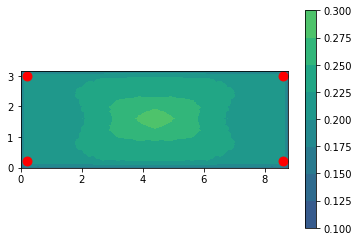

In [ ]:
plt.contourf(xx,yy, np.sqrt(get_error_distribution(centers) / np.pi) / res, vmin=0, vmax=0.4)
plt.colorbar()
plt.scatter(centers.T[0], centers.T[1], c='r', s=80) #, size='10')
plt.gca().set_aspect('equal', adjustable='box')

In [ ]:
centers = np.array((
           (L/2, 0.2),
           (L - 0.2, W/2),
           (L/2, W - 0.2),
           (0.2, W/2)
))

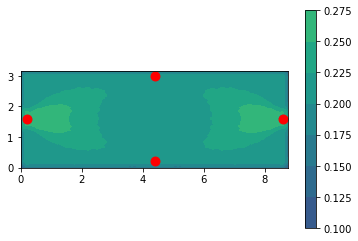

In [ ]:
plt.contourf(xx,yy, np.sqrt(get_error_distribution(centers) / np.pi) / res, vmin=0, vmax=0.4)
plt.colorbar()
plt.scatter(centers.T[0], centers.T[1], c='r', s=80) #, size='10')
plt.gca().set_aspect('equal', adjustable='box')

In [ ]:
centers = np.array((
           (L/2 - 2, 0.2),
           (L - 0.2, W/2 - 1 ),
           (L/2 + 1, W - 0.2),
           (0.2, W/2 + 1)
))

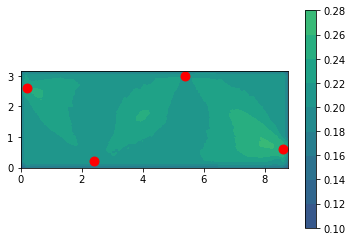

In [ ]:
plt.contourf(xx,yy, np.sqrt(get_error_distribution(centers) / np.pi) / res, vmin=0, vmax=0.4)
plt.colorbar()
plt.scatter(centers.T[0], centers.T[1], c='r', s=80) #, size='10')
plt.gca().set_aspect('equal', adjustable='box')

In [ ]:
centers = np.array((
           (3.07, 0),
           (6.365, 0),
           (3.07, 3.06),
           (0, 1.595)
))

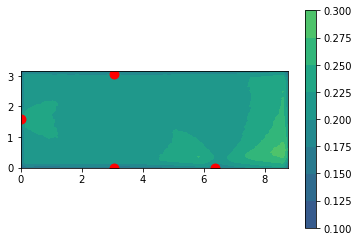

In [ ]:
plt.contourf(xx,yy, np.sqrt(get_error_distribution(centers) / np.pi) / res, vmin=0, vmax=0.4)
plt.colorbar()
plt.scatter(centers.T[0], centers.T[1], c='r', s=80) #, size='10')
plt.gca().set_aspect('equal', adjustable='box')

In [ ]:
centers = np.array((
           (3.07, 0),
           (6.365, 0),
           (3.07, 3.06),
           (6.365, 3.06)
))

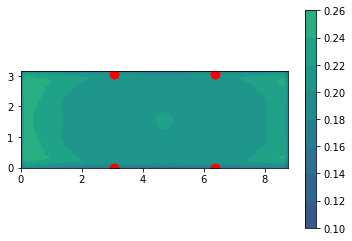

In [ ]:
plt.contourf(xx,yy, np.sqrt(get_error_distribution(centers) / np.pi) / res, vmin=0, vmax=0.4)
plt.colorbar()
plt.scatter(centers.T[0], centers.T[1], c='r', s=80) #, size='10')
plt.gca().set_aspect('equal', adjustable='box')

# Test ||ogram configs

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
L = 8.8
W = 3.2
res = 2e1
xx, yy = np.mgrid[0:L:1/res,0:W:1/res]

In [ ]:
n_configs = 100
mu = np.linspace(0, 0.48, n_configs)

In [ ]:
base_centers = np.array((
           (L/2, 0.2),
           (L - 0.2, W/2),
           (L/2, W - 0.2),
           (0.2, W/2)
))

In [ ]:
def get_centers(mu=0):
  diff = np.array((
           (L*mu, 0),
           (0, W*mu),
           (-L*mu, 0),
           (0, -W*mu)
  ))
  return base_centers + diff

In [ ]:
def get_pt_mask(pt, centers=base_centers, pts=(xx,yy), error=0.2):
  pt = np.array(pt)
  mask = np.ones_like(pts[0], dtype=bool)
  for center in centers:  # vectorize?
    mask &= np.abs(np.sqrt((pts[0] - center[0])**2 + (pts[1] - center[1])**2) - np.linalg.norm(pt - center)) <= error 
  return mask

In [ ]:
def get_error_distribution(centers, pts=(xx,yy)):
  xx, yy = pts
  errors = np.zeros_like(xx, dtype=int)
  for i in range(errors.shape[0]):
    for j in range(errors.shape[1]):
      errors[i, j] = get_pt_mask((xx[i, j], yy[i, j]), centers, pts=pts).sum()
  # aa[:,:] = get_pt_mask((xx[:,:], yy[:,:])).sum() 
  return np.sqrt(errors / np.pi) / res

In [ ]:
def plot_distribution(centers, errors):
  plt.contourf(xx,yy, errors, vmin=0, vmax=0.4)
  plt.colorbar()
  plt.scatter(centers.T[0], centers.T[1], c='r', s=80) #, size='10')
  plt.gca().set_aspect('equal', adjustable='box')

mu = 0.00	Error: (0.116, 0.272) :  0.216 meters


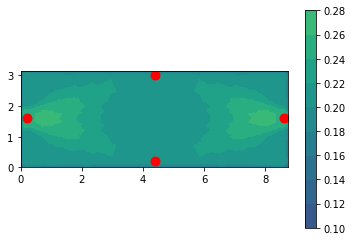

In [ ]:
mu = 0.0
centers = get_centers(mu)
dist = get_error_distribution(centers)
plot_distribution(centers, dist)
print(f"mu = {mu:.2f}\tError: ({dist.min():.3f}, {dist.max():.3f}) :  {dist.mean():.3f} meters")

mu = 0.10	Error: (0.116, 0.266) :  0.216 meters


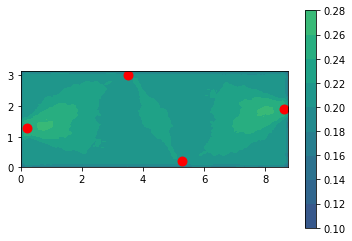

In [ ]:
mu = 0.1
centers = get_centers(mu)
dist = get_error_distribution(centers)
plot_distribution(centers, dist)
print(f"mu = {mu:.2f}\tError: ({dist.min():.3f}, {dist.max():.3f}) :  {dist.mean():.3f} meters")

mu = 0.20	Error: (0.116, 0.255) :  0.217 meters


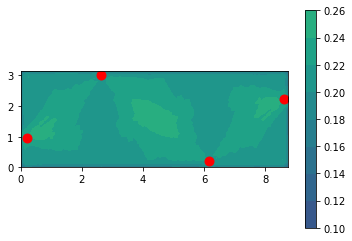

In [ ]:
mu = 0.2
centers = get_centers(mu)
dist = get_error_distribution(centers)
plot_distribution(centers, dist)
print(f"mu = {mu:.2f}\tError: ({dist.min():.3f}, {dist.max():.3f}) :  {dist.mean():.3f} meters")

mu = 0.30	Error: (0.116, 0.266) :  0.218 meters


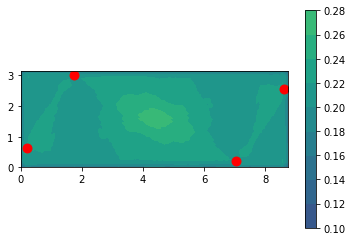

In [ ]:
mu = 0.3
centers = get_centers(mu)
dist = get_error_distribution(centers)
plot_distribution(centers, dist)
print(f"mu = {mu:.2f}\tError: ({dist.min():.3f}, {dist.max():.3f}) :  {dist.mean():.3f} meters")

mu = 0.40	Error: (0.116, 0.274) :  0.219 meters


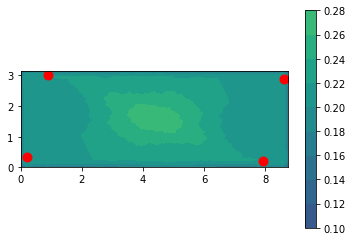

In [ ]:
mu = 0.4
centers = get_centers(mu)
dist = get_error_distribution(centers)
plot_distribution(centers, dist)
print(f"mu = {mu:.2f}\tError: ({dist.min():.3f}, {dist.max():.3f}) :  {dist.mean():.3f} meters")

mu = 0.15	Error: (0.116, 0.260) :  0.216 meters


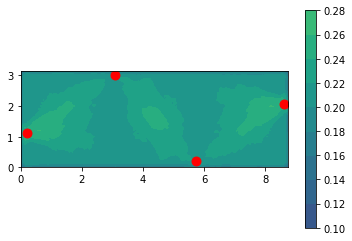

In [ ]:
mu = 0.15
centers = get_centers(mu)
dist = get_error_distribution(centers)
plot_distribution(centers, dist)
print(f"mu = {mu:.2f}\tError: ({dist.min():.3f}, {dist.max():.3f}) :  {dist.mean():.3f} meters")

mu = 0.20	Error: (0.11631, 0.25545) :  0.21665 meters


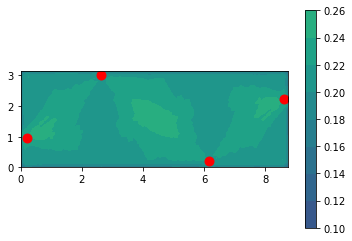

In [ ]:
mu = 0.2
centers = get_centers(mu)
dist = get_error_distribution(centers)
plot_distribution(centers, dist)
print(f"mu = {mu:.2f}\tError: ({dist.min():.5f}, {dist.max():.5f}) :  {dist.mean():.5f} meters")

mu = 0.17	Error: (0.11631, 0.25545) :  0.21647 meters


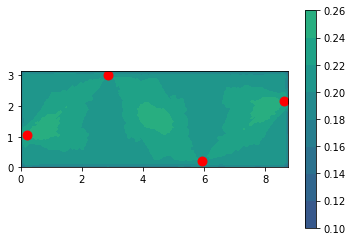

In [ ]:
mu = 0.175
centers = get_centers(mu)
dist = get_error_distribution(centers)
plot_distribution(centers, dist)
print(f"mu = {mu:.2f}\tError: ({dist.min():.5f}, {dist.max():.5f}) :  {dist.mean():.5f} meters")

In [ ]:
print(centers)

[[5.94 0.2 ]
 [8.6  2.16]
 [2.86 3.  ]
 [0.2  1.04]]
